# Discovery trends in common e-commercial websites

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv('tiki_trans.csv')
df.head()

,Unnamed: 0,Visited
0,2016-12-01,29228
1,2016-12-02,52679
2,2016-12-03,43197
3,2016-12-04,39878
4,2016-12-05,40149


In [3]:
df.columns = ['Date', 'Visited']
df.head()

,Date,Visited
0,2016-12-01,29228
1,2016-12-02,52679
2,2016-12-03,43197
3,2016-12-04,39878
4,2016-12-05,40149


In [4]:
df.set_index('Date', inplace=True)
df.head()

,Visited
Date,
2016-12-01,29228
2016-12-02,52679
2016-12-03,43197
2016-12-04,39878
2016-12-05,40149


<AxesSubplot:xlabel='Date'>

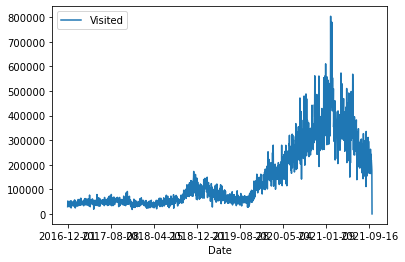

In [5]:
df.plot()

In [6]:
df.tail()

,Visited
Date,
2021-09-27,219003
2021-09-28,201223
2021-09-29,193119
2021-09-30,177363
2021-10-01,0


In [14]:
import datetime as dt

class Timer():

    def __init__(self):
        self.start_dt = None

    def start(self):
        self.start_dt = dt.datetime.now()

    def stop(self):
        end_dt = dt.datetime.now()
        print('Time taken: %s' % (end_dt - self.start_dt))

In [7]:
train_test_split = 0.9 # Take 90% data as training data
split_idx = int(train_test_split * df.shape[0])

df_train = df[:split_idx]
df_test = df[split_idx:-1]

len_train = df_train.shape[0]
len_test = df_test.shape[0]
len_train_windows = None

In [8]:
def get_test_data(seq_len, normalize):
    """
    Create x, y test data windows.
    """
    
    data_windows = []
    for i in range(len_test - seq_len):
        data_windows.append(data_test[i:i+seq_len])
        
    data_windows = np.array(data_windows).astype(float)
    data_windows = normalise_windows(data_windows, single_window=False) if normalize else data_windows
    
    x = data_windows[:, :-1]
    y = data_windows[:, -1, [0]]
    return x, y

In [9]:
def generate_train_batch(seq_len, batch_size, normalise):
    """Yield a generator of training data from filename on given list of cols split for train/test"""
    i = 0
    while i < (len_train - seq_len):
        x_batch = []
        y_batch = []
        for b in range(batch_size):
            if i >= (len_train - seq_len):
                # stop-condition for a smaller final batch if data doesn't divide evenly
                yield np.array(x_batch), np.array(y_batch)
                i = 0
            x, y = _next_window(i, seq_len, normalise)
            x_batch.append(x)
            y_batch.append(y)
            i += 1
        yield np.array(x_batch), np.array(y_batch)

In [10]:
def _next_window(i, seq_len, normalise):
    '''Generates the next data window from the given index location i'''
    window = data_train[i:i+seq_len]
    window = normalise_windows(window, single_window=True)[0] if normalise else window
    x = window[:-1]
    y = window[-1, [0]]
    return x, y

In [11]:
def normalise_windows(window_data, single_window=False):
    '''Normalise window with a base value of zero'''
    normalised_data = []
    window_data = [window_data] if single_window else window_data
    for window in window_data:
        normalised_window = []
        for col_i in range(window.shape[1]):
            normalised_col = [((float(p) / float(window[0, col_i])) - 1) for p in window[:, col_i]]
            normalised_window.append(normalised_col)
        normalised_window = np.array(normalised_window).T # reshape and transpose array back into original multidimensional format
        normalised_data.append(normalised_window)
    return np.array(normalised_data)

In [13]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, input_shape=None, return_sequences=return_seq),
    
])